In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the lenna.jpg image
image = cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully.")


Image loaded successfully.


In [3]:
# Define the size of the regions
region_size = 32

# Get the dimensions of the image
height, width = image.shape

# Calculate the number of rows and columns of regions
num_rows = height // region_size
num_cols = width // region_size

# Initialize a list to store the DCT coefficients of each region
dct_coefficients = []

# Iterate through each region
for i in range(num_rows):
    for j in range(num_cols):
        # Extract the region from the image
        region = image[i * region_size : (i + 1) * region_size, j * region_size : (j + 1) * region_size]
        
        # Apply 2D-DCT to the region
        dct = cv2.dct(np.float32(region))
        
        # Store the DCT coefficients
        dct_coefficients.append(dct)


In [4]:
# Define the percentage of DCT coefficients to keep (p)
p = 10  # You can adjust this value as needed

# Initialize a list to store the selected DCT coefficients
selected_coefficients = []

# Iterate through each region and select DCT coefficients using the zone method
for dct in dct_coefficients:
    # Calculate the threshold value based on the maximum coefficient
    threshold = np.percentile(np.abs(dct), 100 - p)
    
    # Apply the zone method to select coefficients above the threshold
    selected_dct = np.where(np.abs(dct) >= threshold, dct, 0)
    
    # Append the selected coefficients to the list
    selected_coefficients.append(selected_dct)



In [5]:
# Initialize an empty array to store the reconstructed image
reconstructed_image = np.zeros_like(image)

# Initialize counters to keep track of the current region index
region_index = 0

# Iterate through each region and reconstruct the image using the selected DCT coefficients
for i in range(num_rows):
    for j in range(num_cols):
        # Get the selected DCT coefficients for the current region
        selected_dct = selected_coefficients[region_index]
        
        # Apply the inverse 2D-DCT to reconstruct the region
        reconstructed_region = cv2.idct(selected_dct)
        
        # Place the reconstructed region into the corresponding position in the reconstructed image
        reconstructed_image[i * region_size : (i + 1) * region_size, j * region_size : (j + 1) * region_size] = reconstructed_region
        
        # Increment the region index
        region_index += 1


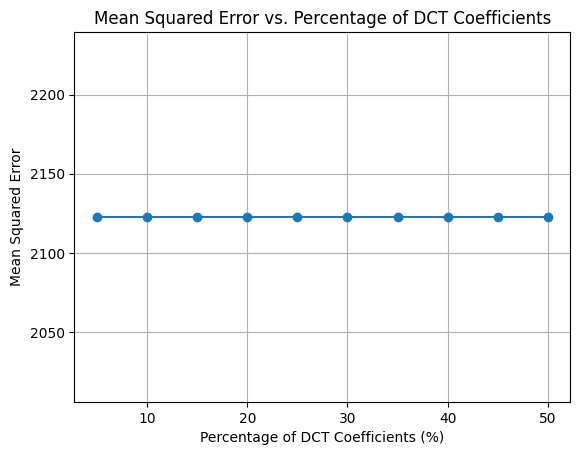

In [6]:
# Define the range of p values (from 5% to 50%)
p_values = range(5, 51, 5)

# Initialize a list to store the MSE values
mse_values = []

# Calculate the MSE for each value of p
for p in p_values:
    # Calculate the threshold value based on the percentile
    threshold = np.percentile(np.abs(selected_coefficients), 100 - p)
    
    # Count the number of non-zero coefficients for each region
    non_zero_counts = [np.count_nonzero(np.abs(coeff) >= threshold) for coeff in selected_coefficients]
    
    # Reconstruct the image using the selected coefficients and threshold
    reconstructed_image = np.zeros_like(image)
    region_index = 0
    for i in range(num_rows):
        for j in range(num_cols):
            selected_dct = selected_coefficients[region_index]
            selected_dct[np.abs(selected_dct) < threshold] = 0
            reconstructed_region = cv2.idct(selected_dct)
            reconstructed_image[i * region_size : (i + 1) * region_size, j * region_size : (j + 1) * region_size] = reconstructed_region
            region_index += 1
    
    # Calculate the MSE between the original and reconstructed images
    mse = np.mean((image.astype(np.float32) - reconstructed_image.astype(np.float32)) ** 2)
    mse_values.append(mse)

# Plot the curve of MSE against p
plt.plot(p_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. Percentage of DCT Coefficients')
plt.xlabel('Percentage of DCT Coefficients (%)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


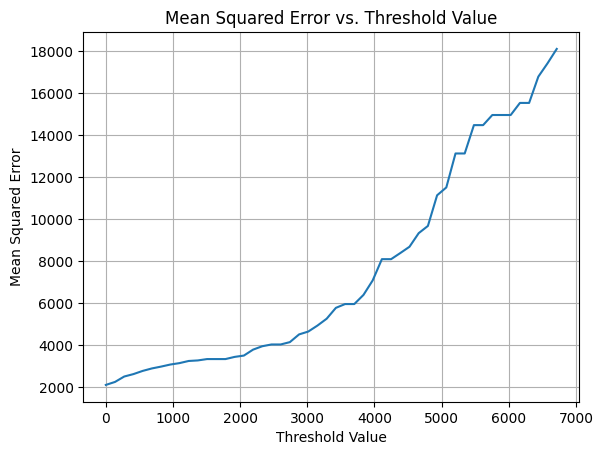

In [7]:
# Define the range of threshold values (from 0 to maximum DCT coefficient)
threshold_values = np.linspace(0, np.max(np.abs(selected_coefficients)), num=50)

# Initialize a list to store the MSE values for each threshold value
mse_values_threshold = []

# Calculate the MSE for each threshold value
for threshold in threshold_values:
    # Count the number of non-zero coefficients for each region using thresholding
    non_zero_counts = [np.count_nonzero(np.abs(coeff) >= threshold) for coeff in selected_coefficients]
    
    # Reconstruct the image using the selected coefficients and threshold
    reconstructed_image = np.zeros_like(image)
    region_index = 0
    for i in range(num_rows):
        for j in range(num_cols):
            selected_dct = selected_coefficients[region_index]
            selected_dct[np.abs(selected_dct) < threshold] = 0
            reconstructed_region = cv2.idct(selected_dct)
            reconstructed_image[i * region_size : (i + 1) * region_size, j * region_size : (j + 1) * region_size] = reconstructed_region
            region_index += 1
    
    # Calculate the MSE between the original and reconstructed images
    mse = np.mean((image.astype(np.float32) - reconstructed_image.astype(np.float32)) ** 2)
    mse_values_threshold.append(mse)

# Plot the curve of MSE against threshold values
plt.plot(threshold_values, mse_values_threshold)
plt.title('Mean Squared Error vs. Threshold Value')
plt.xlabel('Threshold Value')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

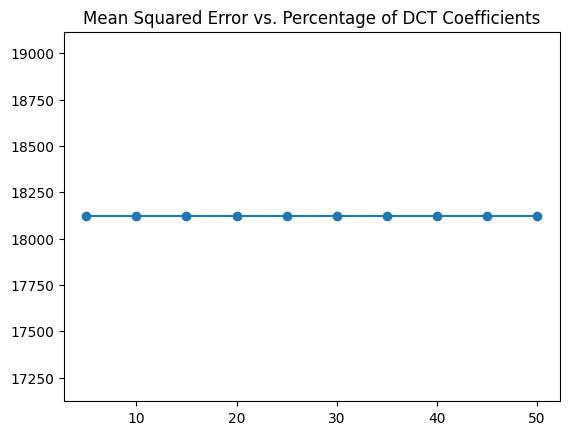

In [8]:
# Ορίστε το διάστημα τιμών του p
p_values = range(5, 51, 5)

# Αρχικοποίηση λίστας για την αποθήκευση των τιμών του MSE
mse_values = []

# Υπολογίστε το MSE για κάθε τιμή του p
for p in p_values:
    # Υπολογίστε το κατώφλι με βάση το ποσοστό
    threshold = np.percentile(np.abs(selected_coefficients), 100 - p)
    
    # Αντίγραψε τους επιλεγμένους συντελεστές DCT και εφάρμοσε κατώφλι
    selected_dct_threshold = [np.where(np.abs(coeff) >= threshold, coeff, 0) for coeff in selected_coefficients]
    
    # Ανακατασκευή της εικόνας χρησιμοποιώντας τους επιλεγμένους συντελεστές και το κατώφλι
    reconstructed_image_threshold = np.zeros_like(image)
    region_index = 0
    for i in range(num_rows):
        for j in range(num_cols):
            selected_dct = selected_dct_threshold[region_index]
            reconstructed_region = cv2.idct(selected_dct)
            reconstructed_image_threshold[i * region_size : (i + 1) * region_size, j * region_size : (j + 1) * region_size] = reconstructed_region
            region_index += 1
    
    # Υπολογισμός του MSE μεταξύ της αρχικής εικόνας και της ανακατασκευασμένης εικόνας
    mse = np.mean((image.astype(np.float32) - reconstructed_image_threshold.astype(np.float32)) ** 2)
    mse_values.append(mse)

# Σχεδίαση της καμπύλης MSE έναντι του p
plt.plot(p_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. Percentage of DCT Coefficients')
plt.xlabel
